In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

cancer_data = pd.read_csv('cancer_data.csv')
cancer_data = cancer_data.drop(columns = ['Unnamed: 0'])
cancer_data = cancer_data.iloc[:, :12]
cancer_data.head()

,diagnosis,children,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,Yes,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,No,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,Yes,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,No,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,Yes,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [2]:
cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


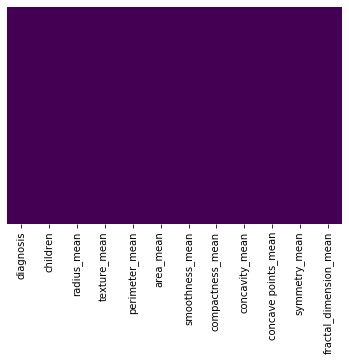

In [3]:
sns.heatmap(cancer_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis') # Check the NA

In [4]:
sns.set()
plt.rcParams["patch.force_edgecolor"] = True

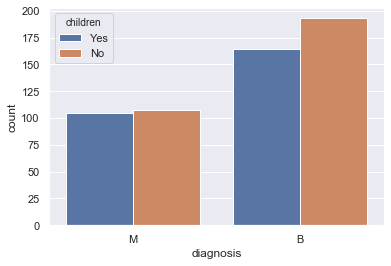

In [5]:
sns.countplot(x = 'diagnosis', hue = 'children', data = cancer_data)


In [6]:
children = pd.get_dummies(cancer_data['children'], drop_first = True)
children.rename(columns={'Yes': 'Child'}, inplace = True)
children.head()

,Child
0,1
1,0
2,1
3,0
4,1


In [7]:
cancer_data = pd.concat([cancer_data, children], axis = 1)
cancer_data.head()

,diagnosis,children,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Child
0,M,Yes,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,M,No,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,M,Yes,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,M,No,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,M,Yes,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


In [8]:
cancer_data = cancer_data.iloc[:,[0,2,3,6,7,8,9,10,11,12]]
cancer_data.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Child
0,M,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,M,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,M,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,M,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,M,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


# Model Logistic Regression Testing

In [9]:
X = cancer_data.iloc[:, 1:]
y = cancer_data.iloc[:,0]

In [10]:
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Child
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


In [11]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [13]:
X_train

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Child
408,17.99,20.66,0.10360,0.13040,0.120100,0.088240,0.1992,0.06069,1
4,20.29,14.34,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,1
307,9.00,14.40,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,0
386,12.21,14.09,0.08108,0.07823,0.068390,0.025340,0.1646,0.06154,1
404,12.34,14.95,0.08682,0.04571,0.021090,0.020540,0.1571,0.05708,1
...,...,...,...,...,...,...,...,...,...
129,19.79,25.12,0.10150,0.15890,0.254500,0.114900,0.2202,0.06113,0
144,10.75,14.97,0.07793,0.05139,0.022510,0.007875,0.1399,0.05688,1
72,17.20,24.52,0.10710,0.18300,0.169200,0.079440,0.1927,0.06487,1
235,14.03,21.25,0.09070,0.06945,0.014620,0.018960,0.1517,0.05835,1


In [14]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [15]:
X_train

array([[ 1.0449852 ,  0.29708512,  0.52642027, ...,  0.66363209,
        -0.30258962,  1.05189423],
       [ 1.68141074, -1.14098169,  0.28608701, ..., -0.00849186,
        -0.57977321,  1.05189423],
       [-1.44260855, -1.12732916, -1.91696783, ..., -0.08562083,
         0.8359494 , -0.95066592],
       ...,
       [ 0.82638686,  1.17539807,  0.78131917, ...,  0.42489954,
         0.32032833,  1.05189423],
       [-0.05077356,  0.43133503, -0.41306428, ..., -1.08095192,
        -0.65130446,  1.05189423],
       [-0.32748032, -0.21260945, -0.47642487, ..., -1.26459234,
        -0.6095779 , -0.95066592]])

In [16]:
#Fiting Logistic Regression to the Training Set#Fiting 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import time

start = time.time()
classifier = LogisticRegression(C = 0.1, random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
scores = cross_val_score(classifier, X, y)
end = time.time()

In [17]:
print('intercept', classifier.intercept_[0])
print(pd.DataFrame({'coeff': classifier.coef_[0]}, index = cancer_data.iloc[:, 1:].columns).transpose())

intercept -0.6594791506679307
       radius_mean  texture_mean  smoothness_mean  compactness_mean  \
coeff     1.199622      0.742645         0.364813          0.431728   

       concavity_mean  concave points_mean  symmetry_mean  \
coeff        0.723083             1.009966       0.174107   

       fractal_dimension_mean     Child  
coeff                -0.51698  0.047924  


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           B       0.92      1.00      0.96        72
           M       1.00      0.86      0.92        42

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[72  0]
 [ 6 36]]


In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

accuracy_all = accuracy_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

print("Logistic Accuracy: {0:.2%}".format(accuracy_all))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


[[72  0]
 [ 6 36]]


              precision    recall  f1-score   support

           B       0.92      1.00      0.96        72
           M       1.00      0.86      0.92        42

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Logistic Accuracy: 94.74%
Cross validation score: 88.75% (+/- 5.58%)
Execution time: 0.1899 seconds 



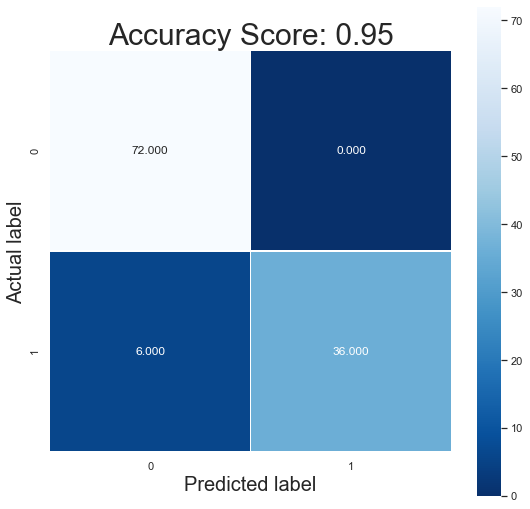

In [23]:
score = classifier.score(X_test, y_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label', size = 20);
plt.xlabel('Predicted label', size = 20);
all_sample_title = 'Accuracy Score: {}'.format(round(score, 2))
plt.title(all_sample_title, size = 30);

### Optimization

In [24]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV

In [26]:
LR_params = {'C':[0.001, 0.1, 1, 10, 100, 1000]}

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
model_grid = GridSearchCV(LogisticRegression(), LR_params)
model_grid.fit(X_train, y_train)
print("Best C values: ", model_grid.best_params_)
print()
model_grid.best_estimator_
grid_predictions = model_grid.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

cv_results = cross_val_score(model_grid, X_train, y_train, cv = kfold, scoring='accuracy')
print("Logistic Accuracy: {0:.2%}".format( accuracy_score(y_test, grid_predictions)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(cv_results), np.std(cv_results)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


Best C values:  {'C': 0.1}

[[72  0]
 [ 6 36]]
              precision    recall  f1-score   support

           B       0.92      1.00      0.96        72
           M       1.00      0.86      0.92        42

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Logistic Accuracy: 94.74%
Cross validation score: 93.19% (+/- 2.56%)
Execution time: 0.1899 seconds 



In [27]:
start = time.time()
classifier = LogisticRegression(C = 0.1, random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
scores = cross_val_score(classifier, X, y)
end = time.time()

print("Logistic Accuracy: {0:.2%}".format( accuracy_score(y_test, grid_predictions)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(cv_results), np.std(cv_results)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Logistic Accuracy: 94.74%
Cross validation score: 93.19% (+/- 2.56%)
Execution time: 0.17598 seconds 

